In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [76]:
# get titanic data as a pandas DataFrame
tdf = pd.read_csv("titanic_data.csv")

# preview the data
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [77]:
#     VARIABLE DESCRIPTIONS:
#     survival        Survival
#                     (0 = No; 1 = Yes)
#     pclass          Passenger Class
#                     (1 = 1st; 2 = 2nd; 3 = 3rd)
#     name            Name
#     sex             Sex
#     age             Age
#     sibsp           Number of Siblings/Spouses Aboard
#     parch           Number of Parents/Children Aboard
#     ticket          Ticket Number
#     fare            Passenger Fare
#     cabin           Cabin
#     embarked        Port of Embarkation
#                     (C = Cherbourg; Q = Queenstown; S = Southampton)

In [78]:
# Questions:

# 1. Fare and Class which probably are close related and can be substituted for one list describing wealth
# 2. Relate survival with age, family or wealth
# 3. 
# 
# 
# 
# 

In [79]:
# remove not relevant colums
tdf = tdf.drop(['PassengerId','Name','Ticket', 'Cabin', 'Sex'], axis=1)

tdf.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
886,0,2,27.0,0,0,13.00,S
887,1,1,19.0,0,0,30.00,S
888,0,3,NaN,1,2,23.45,S
889,1,1,26.0,0,0,30.00,C
890,0,3,32.0,0,0,7.75,Q


In [80]:
# Check data information
tdf.info()

# There is data missing from Age and Embraked columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


-0.549499619944 correlation


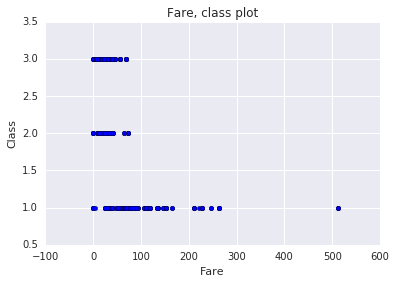

In [88]:
fare, pclass = pd.Series(tdf['Fare']), pd.Series(tdf['Pclass'])
print (pclass.corr(fare, 'pearson'), 'correlation')


plt.title("Fare, class plot")
plt.xlabel("Fare")
plt.ylabel("Class")
plt.scatter(fare, pclass)